# simple linear regression

# import relevant libraries

In [63]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
#To be added later
import seaborn as sns
sns.set()

# load the data

In [64]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [65]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


# to get the most useful description, we use data.describe(), which is pandas method use to get most useful statistical observations in data frame

In [66]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


# let's explore the data frame problems.

<b> we have sample of 84 students who studied in college. <br>
the total <b> SAT = Critical-Reading + Mathematics + writing <br>
<b> while the GPA = Grade point average(at graduation from university). <br>
    
<b> we will create a linear regression that will predict the GPA based on the SAT score obtained.
    
    <b> this can be done through this process:
        Get a score <-------All college-----Graduate with some GPA.
                                
                         pls its important to create a meaningful regresion.
                   


# why would i predict with SAT?

### 1. the SAT is considered one of the best estimatios of intellectual capacity and capability. ie on average, if you did well in SAT you will do well in college and in working places.

### 2. Almost all college across the USA are using the SAT are a proxy for admission

### 3. The SAT stood the test of time, which establish it's self as a leading exam for admissions.

# therefore it's safety to say our regression makes sense

# Create our first regression.

#### Define the dependent and the independent variables.

## formular: yhat = b0 + b1x1. 

### our dependent variable is GPA, therefore our variable should be called y, which conatin the GPA.

### independent variable is x1

In [67]:
y = data['GPA']
x1 = data['SAT']

# Explore the data

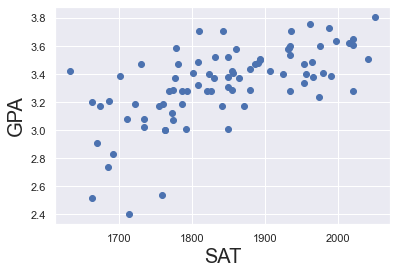

In [68]:
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# the graph above shows that the higher the SAT the higher their GPA

# Creating a Regression itself. 
### remember we have our x1 but no x0

In [30]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           7.20e-11
Time:                        16:38:52   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# result: this contains the output of the ordinary least squarers (OLS) regression.

# fit method: this will apply a specific estimation technique (OLS in this case) to obtain the fit of the model

# let's plot the regression line in same scatter plot.

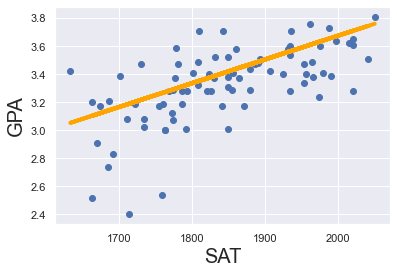

In [71]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Quick lecture about seaborn. this is a package built ontop of matplotlib, prietier while dealing with graph. in the past it overrides matplotlob when imported, but after an update in 2017, it's no more loike that. so we're going to add it above where othere are as well.  in thos course we will coede with matplotlib but use seaborn style.

# How to interpret the Regression table above

### The graph is a visual representation of a regression. and what we really want is the equation of the model and the measure of the significant and explanatory power. this is why the regression summarry is consist of few tables instead of a grapgh. in this lesson we'll learn how to read and understand this table.

### typically, using stats models three main tables and they're:

## 1.  Model summary.
## 2. Coefficient Table.
## 3. Additional text
#### certainly this table contain allots of informations but we will focus on the most important parts.

## 2. Coefficient Table. 
#### we can see the coefficient of the intersept or the costant as they name it here which is (const 0.2750). <br>

# formular: yhat = b0+b1x1 <br>
<b> this simply means from fromm the formular above: <br>
    b0 = 0.275 <br>
    b1 = 0.0017 <br>
<b> these are the only two numbers we need to define the regression equation. <br>
    <b> theefore our equation from the formular is : <br>
        yhat = 0.275 + 0.0017 multiply by X1 <br>
        or GPA = 0.257 + 0.0017 * SAT. <br>
        
        so this is how we obtain the SAT scores.

## now look at how the graph was made:
# yhat = 0.0017*x1 + 0.275 = outr regressio line.
#### wich was plotted using the plot method, naturally i picked the coefficient from the coefficient table.

# How useful is that prediction you may ask?
## well knowing that the person ha scored 1700 in the SAT, we can substitude the equation and obtain the following:
# = 0.257 + 0.0017 * 1700 = 3.165.

## now from our prediction the expected GPA for this student according to our model is 3.165. and that's the predictive power of linear regression.

# what about the other cells in the same table?
## standdard error/ std err: this shows the accuracy of prediction accuracy to each variable. the lower the standard error the better the estimator.

# the next is the t statictics and the |t| value, well if you followed our programe so far you'll know the hypothesis involved here. the non hypothesis in this test is: Beta = 0 ie mathematically: 
# H0:B = 0.

## in other words, is the coefficient = 0?.
### 

# if the coefficient = 0,  ie if b0 =, then the line crosses the y axis at the origin, shown below.

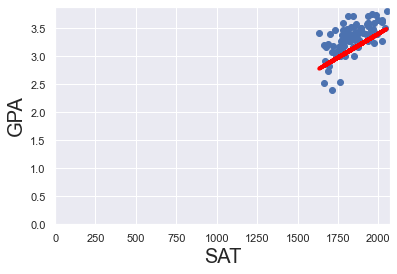

In [32]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0
fig = plt.plot(x1,yhat, lw=4, c='red', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.ylim(0)
plt.xlim(0)
plt.show()

#  ad if, b1 = 0, and 0 * x = 0, then yhat = b0. 
# therefore this variable will not be considerable to the model. graphically, that means the regresson line will be horizontal always going through the enterception value 

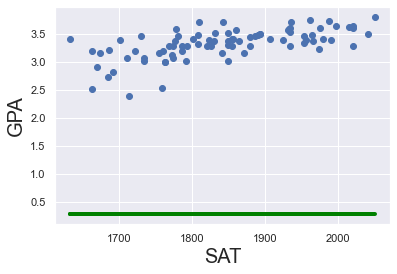

In [42]:
plt.scatter(x1,y)
yhat = 0*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='green', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## let's paraphrase this test, questions like:
# 1. is this a useful variale?
# 2. does it help us explain the variaility we have in this case?

## the answer is contained in the p value column ie,  p>|t|, as we know ::
### A p-value < 0.05, means that the variable is significant, therefore the coefficient is more probably 0.

# now look below the p-value in the SAT row, you'll see 0.000, what does it means?
##  SAT score is a significant variable whe predicting college GPA, what you might noticed is that the intersept p-value is  not 0. let's think about this! the text is asking the question like does it matter that much? do we have enough statistical evidence of intercept the first as zero? we that is not what we're actually looking at.

# DECOMPOSITION OF VARIABILITY.
## we alredy saw the example of regression model. yhat = b0 + b1X1.
# college GPA = 0.275 + 0.0017*SAT.

### in this lesson we're going to explore the determinant of a good regresion.
# this lesson is based on ANOVA frame-work (You might have heard it before).



# there are three terms we must define:
## 1. The sum of the squares total (SST)
## 2. The sum of squares regression (SSR)
## 3. The sum of squares error (SSE)

# 1. The sum of the squares total (SST) aslso known as Total sum of squares(TSS). 

##  this is the square differences between the observed dependent variable and it's mean.
# ie sum (yi - ybar)**2.
### think of as the measure of the total variablity of the dataset

# 2. The sum of squares regression (SSR) also known as Explained Sum of squares (ESS).

## this is the sum of the different between the pedictive value and the mean of the dependent variable.
# ie, sum of (yi hat - ybar)**2.
### think of as the measurement that explains variability by your line in the graph.
### if this avlue of the SSE is =  the sum of  squares total it means that your regression model captures all observed variablity and it's perfect. 

# 3. The sum of squares error (SSE) also known as residual sum of squares(RSS).

## the  error is the difference between the observed value and the predictive value. we usually want to minimize the error, the smaller the error the better the estimation power of the regression

## therefore this (SSE) measures the unexplained variability by the regression, residual ie remaining or unexplained 
# ie, sum of (ei**2).


# what is the connection among this three?.

# mathematically SST = SSR + SSE ie
# sum of (yi - ybar)**2 = sumof(yi hat - yar)**2 + sumof(ei**2). ie

## total variablity =  variablity explained in the regression line + unexplained variablity(error).

# note, always remember that the lower your error the powerful your predictive gression poweful else the lesser

# What is the OLS

## let's visit our table we'll be walking with the [We have the Dependent variable which is the](GPA ie Dep. Variable = GPA). this s the variable we're trying to predict, obviously it's the GPA. Especially in the begining it's good to double check if you coded the regression properly.

## Next we have the [Model which is](OLS, is Model = OLS).
# the method is literally close (list Squared).

# therefore Odinary Least Squares (OLS) is the most common methods estimate the linear regression equation.
# LS stands for minimum squares error or SSE. you may recall that lower error => better explanatory power, therefore this method aims to find the line which mininmizes the sum of the squares error, ie for a better explanatory power.

# now to clearify this, imagine having a graph with any lines (regresion lins), the best of is the one closer to all points simutaneously, that's the work of the OLS to determine which is the one with the smallest error.

# the formular is:
# this is the minimization problem that uses to calculate the linear algebra, to determine the slope and intersept of the line.

### min Sum**n =1**e**2i
## therefore S(b) is the OLS estimator of B for a simple linear regression.

# S(b) = sum(yi - xi**r b)**2 = (y - xb)**t(y-xb)

$$\sum_{j=0}^{+\infty} A_{j}$$

# therefore Odinary Least Squares (OLS) is the most common methods estimate the linear regression equation.
# LS stands for minimum squares error or SSE. you may recall that lower error => better explanatory power, therefore this method aims to find the line which mininmizes the sum of the squares error, ie for a better explanatory power.

# now to clearify this, imagine having a graph with any lines (regresion lins), the best of is the one closer to all points simutaneously, that's the work of the OLS to determine which is the one with the smallest error.

# the formular is:
# this is the minimization problem that uses to calculate the linear algebra, to determine the slope and intersept of the line.

### min Sum**n =1**e**2i
## therefore S(b) is the OLS estimator of B for a simple linear regression.

# S(b) = sum(yi - xi**r b)**2 = (y - xb)**t(y-xb)

$$\sum_{j=0}^{+\infty} A_{j}$$


# trying to minimize some of errors on papa, but with dataset that comprises thousands of data this is almost impossible.

# nowadays regression analysis is perform through SOFTWARE. beginers statistion perform.

# 1. Excel
# 2. XPSS
# 3. SaS and
# 4. Stata for calculations.

## data science however favourite programming languages are:

# 1. R  language and 
# 2. Python. as the offer limitliness capabilities and unmatch speed and that's what are aiming for here.

# other methods for determining regression line are:

# 1. Generalized least squares
# 2. maximum likelihood estimation
# 3. Bayesian regression
# 4. kernel regression
# 5. gaussian process regression.

# however the OLS is simple and powerful enough, so we'll stick with it.

# the next very important output in this table summary is the R-squared. 

## so fat we decomposed the total variabilites into two:
# 1. Explained => SSR and
# 2. Unexplained SSE.

### we've also noticed that the smaller the regrssion error the higher the explanatary power. but this is statistics there must be one widely used method that describes how poweful the regression is right?.
##### well unfutunately or futunatly depending on your attitude there maybe: let me introduce you to....
# R squared: (R^2).
#### this is intuitive and practical tool it's in the right hand it's equal variability explained by the regresion divided by the total variability of the dataset ie.

# $R^2$ = SSR divided by SST
# this explains the measurement of events occurent. ie
# $R^2$ 0------------------------------1: therefore if the $R^2$ = 0 your regression model explains NONE of the variability. while $R^2$ = 1, means your models explains entire variability of the data, but unfutunatly regression who explains the entire variabilities are rare, but we can always encounter variabilities ranging from 0.2 to 0.9. 

# students always ask what s good $R^2$?.
## when do i know that my regression is good enough?
### a regret to tell you that there's no answer to that. 

# in fields such as physics and chemistry, sceintist are looking for $R^2$ between 0.7 and 0.99.
# however in social sciences such as Economics, finance and psychology, the $R^2$ of 0.2 or 20% variability explained by the model could be fantastic, it depends on the complexity of the topic and how many variables are believed to be in play.

# think about your your icome:
### 1. it may depends on your household income includding your parents and spals
### 2. Your Education
### 3. Tenure
### 4. Country you are living in
### 5. language you speak.

### and all this may still in count $R^2$ < 50% of te variability income, your salary is a very comple issue

# let's check on our SAT GPA example
## College GPA = 0.275+0.0017*SAT.
# checking on this you'll find out that our R-squared = 0.406, in order words our SAT explains the 41% of the variablity of the college grade.
# therefore $R^2$ 41% is neither good nor bad, it's far away from 90%, well may include that we are missing some important information, other determinant must be considered such as:
<ul>
    <li>Gender</li> 
    <li>Income</li> 
    <li>mode of studies</li> 
</ul>

<b> before agreeing that factor is crucial you should try to understand why, critical thinking requires allots from you, and you must apply it all.
    

# UNDERSTANDING WHY GENDER?
## women are more likely to outperform than men in high school, but then in higher education more men are into academia. Yea there are many bioses in place here without telling you a female or male candidate are better, scientist shows that a gender gap exist between men and female in education, and gender is an important input to consider for any reggression on the topic 

# UNDERSTANDING WHY INCOME?
## well if your household income is low you're more likely to get a per-time job, therefore you have less time to study and proberbly get a lower grade.

# UNDERSTANDING WHY MODE OF STUDY?
## if you have a child or married it'll defnately affect your studies this will reult a lower attendace. Attendancee is one of the most significant factor for your GPA

# The bottom line is that the $R^2$ measures the goodness of fit of your model, the more factors included in your regression the higher the $R^2$. so should we include GENDER, INCOME, MODE OF STUDY in our regression?. well if according to your reserch and you find it useful why not. 

# MULTIPLE LINEAR REGRESSION.
## just as we said ealier that someone income does not depends solely on education bur also with experience the time they have spent on current employer, household-income, tenure, country you are living in and language you speak.

## we also said that house prices does not depend solely on the size of the house (big or small) but also on location and year of construction.

## college GPA cannot be predicted solely by a student SAT score but also by the high school GPA, INCOME, GENDER, etc.

# for us to have a good models we need a multiple regressions, in order to address the higher complexity of problems. the more variable you have the more factors you're considering in the model. in real world things depends on 2,3, or evn 10, 20 factors.

# POPULATION MULTIPLE REGRESSION MODEL.
# formular: y = B0 + b1x1 +...+ Bkxk + E. 
#### it's similar to simple regression, the main diff. is there are bunsh of independent variables.
# yhat = B0 + B1x1 + E.
## what we are intrested to is the multiple regression Equation. we want to plug-in number and predict outcomes.

## yhat = infered value.
## b0 is the intercept.
## the independent variable range from x1,x2,and xk
## b1 to bk are the corresponding coefficient .

# Note: Multiple regression is not about the most fitting line anymore. it stops two dimensional, and when we have over three dimensionas, there is no visual way to represent the data. so if it's not about the line, then what's is about?

# It's About The Best Fitting Model.
## just as we saw from the OLS, whatwe really want is the ascertain a minimun error (SSE).

# How Do WE Decrease The Model Error?
## well by increassing the explanatory power of the model, SSE and SSR are like communicating vasel remember, each time the lower one the other goes higher, there with each additional variable we increase the explanatory power by 0 or more than 0, we cannot lower it, more variables are of better fitting a better model. lets see how to determine optical number of variable use.


# ADJUSTING $R^2$

# well i know that i told you that $R^2$ is the mostly used measure of explanatory? well that's almost true, but we have to refine this measure, the new version is called the ADJUSTING  𝑅2. a statistitian will always look at it when performing regression analysis. so what is adjust for?

## let's consider two statements we saw in the prevouse lesson:
# 1. The $R^2$ measures how much of the total variability is explained by our model.
# 2. Multiple regressions are always better than simple ones, as with each additional variable you add, the explantory power may only increase or stay the same, considering the number of variables the ajusted $R^2$ is always smaller than the real one.

## the adjusted $R^2$ penalizes excessive use of variables

# our first multiple regression to explain this points